# A Simple XGBoost Tutorial Using the Iris Dataset : https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html

In [15]:
import xgboost as xgb
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset

num_round = 30  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)

bst.dump_model('dump_raw.txt')

In [12]:
preds = bst.predict(dtest)
preds[:10]

array([[0.00480413, 0.9864807 , 0.00871518],
       [0.98502386, 0.01248282, 0.00249332],
       [0.00235551, 0.0048285 , 0.992816  ],
       [0.00367985, 0.9870057 , 0.00931445],
       [0.00452547, 0.95344776, 0.04202676],
       [0.99013793, 0.00735576, 0.00250627],
       [0.00302985, 0.99390537, 0.00306473],
       [0.01037505, 0.03691414, 0.9527108 ],
       [0.00410996, 0.9621626 , 0.03372747],
       [0.00344532, 0.99349123, 0.00306345]], dtype=float32)

In [17]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [19]:
# save the models for later
from sklearn.externals import joblib

joblib.dump(bst, 'bst_model.pkl', compress=True)

['bst_model.pkl']

# XGBoost Algorithm: https://acadgild.com/blog/xgboost-python

In [20]:
#Extreme Gradient Boosting (xgboost) is similar to gradient boosting framework but more efficient. 
#It has both a linear model solver and tree learning algorithms. 
#So, what makes it fast is its capacity to do parallel computation on a single machine.

#This makes xgboost at least 10 times faster than existing gradient boosting implementations. 
#It supports various objective functions, including regression, classification, and ranking.

#Since it is very high in predictive power but relatively slow with implementation, “xgboost” becomes an ideal fit 
#for many competitions. It also has additional features for doing cross-validation and finding important variables.

#In each following iteration, the algorithm pays more attention (assign bigger weights) to instances that were wrongly 
#classified previously. In the first iteration, all instance weights are equal.

#The problem with most tree packages is that they don’t take regularization issues very seriously – they allow to grow many very similar trees that can be also sometimes quite bushy.
#The GBT approach to this problem is to add some regularization parameters. We can:

#control tree structure (maximum depth, minimum samples per leaf),
#control learning rate (shrinkage),
#reduce variance by introducing randomness (stochastic gradient boosting – using random subsamples of instances and features)

#But it could be improved even further using XGBoost.
#XGBoost (extreme gradient boosting) is a more regularized version of Gradient Boosted Trees.

#The main advantages:
#good bias-variance (simple-predictive) trade-off “out of the box”,
#great computation speed,
#the package is evolving (the author is open to accept many PR from the community)
#XGBoost handles only numeric variables.

#Regularization: I believe this is the biggest advantage of xgboost. GBM has no provision for regularization. 
#Regularization is a technique used to avoid overfitting in linear and tree-based models.

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier

In [43]:
data = pd.read_csv('car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [46]:
##The target variable is marked as a class in the data frame. The values are present in string format. 
#However, the algorithm requires the variables to be coded into its equivalent integer codes. 
#We can convert the string categorical values into an integer code using factorize method of the pandas library.
data['class'],class_names = pd.factorize(data['class'])
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [48]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

In [56]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

model = XGBClassifier(params=params).fit(X_train, y_train)

In [57]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 23
Accuracy: 0.96


In [59]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob',
       params={'objective': 'binary:logistic', 'max_depth': 2, 'learning_rate': 1.0, 'silent': 1, 'n_estimators': 5},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

# A Guide to Gradient Boosted Trees with XGBoost in Python: https://jessesw.com/XG-Boost/

In [64]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('./adult.data', header = None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class'])
test_set = pd.read_csv('./adult.test', skiprows = 1, header = None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class'])
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [70]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically
#combined_set

In [75]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [79]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [80]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [82]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [84]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) #`-1` means using all processors
# Optimize for accuracy since that is the metric used in the Adult Data Set notation
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
xgdmat = xgb.DMatrix(final_train, y_train)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [96]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 10,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error
#Will train until cv error hasn't decreased in 100 rounds. Stopping. Best iteration: 432

In [98]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

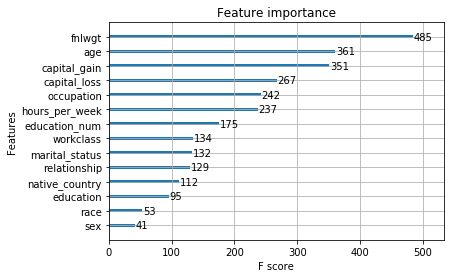

In [102]:
xgb.plot_importance(final_gb)

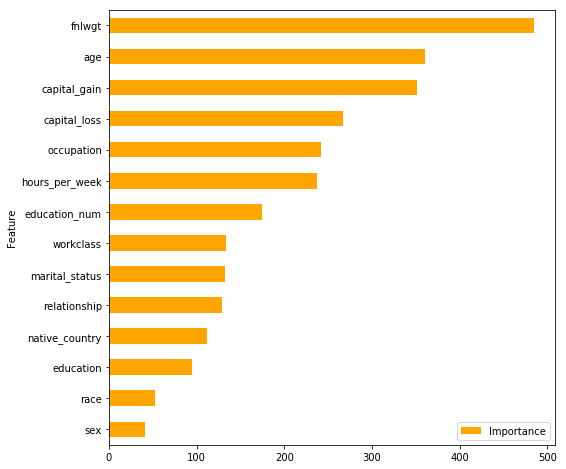

In [108]:
importances = final_gb.get_fscore()
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

# Using XGBoost in Python (XGBoost for a regression problem): https://www.datacamp.com/community/tutorials/xgboost-in-python

In [112]:
#At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. 
#The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 
#Note that a weak learner is one which is slightly better than random guessing.

from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [114]:
data.info()
data['PRICE'] = boston.target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [115]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [117]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [118]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [121]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, #percentage of features used per tree. High value can lead to overfitting.
                          learning_rate = 0.1,#step size shrinkage used to prevent overfitting. Range is [0,1]
                          max_depth = 5, #determines how deeply each tree is allowed to grow during any boosting round.
                          alpha = 10, #L1 regularization on leaf weights. A large value leads to more regularization.
                          n_estimators = 10) #number of trees you want to build
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.397587


In [125]:
#In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the 
#original training dataset are used for both training as well as validation. Also, each entry is used for validation just once.

#This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values 
#as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use 
#num_boost_rounds instead.

params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=50,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

In [127]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,2.356161,0.088743,3.749125,0.438264
46,2.323356,0.089734,3.729875,0.431413
47,2.290159,0.078865,3.716771,0.427517
48,2.268501,0.081120,3.708715,0.427215
49,2.240545,0.071976,3.690853,0.436562


In [129]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

ModuleNotFoundError: No module named 'Graphviz'

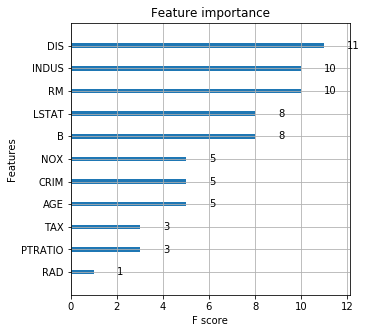

In [136]:
xgb.plot_importance(xg_reg)
plt.figsize = (8, 5)
plt.show()

# Complete Guide to Parameter Tuning in XGBoost (with codes in Python) : https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/